# COMP2002 - Report

#### Please note, that I will be importing the relevant sklearn and other modules where necessary within the cell that will be using that.

#### Although it will look as if I've imported too many times, I'm ensuring that there are no errors due to an import being missed somewhere if code blocks aren't executed chronologically for whatever reason.

# Task 1.1: Data preparation

In [ ]:
import numpy as np

In [ ]:
import pandas

# Load the data
data = pandas.read_excel("ENB2012_data.xlsx")
raw_inputs = data.values[:, :-2].astype(float)

# Get the last two elements for targets
targets = data.values[:, -2:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the inputs
scaler = MinMaxScaler(feature_range=(0, 1))
inputs = scaler.fit_transform(raw_inputs)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the training and test sets
# Set random state to 42 so that we get the same data throughout the algorithm
# This will help hone the algorithm and allow us to increase accuracy
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, random_state=42)

In [ ]:
# Test that the data has been split correctly
print(f"x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}")

x_train: (576, 8)
y_train: (576, 2)
x_test: (192, 8)
y_test: (192, 2)


# Task 1.2: Regression


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Build the model

# Estimators is how many decision trees will come together to get a prediction
# As before, random state allows us to fine tune the model because it locks in
# the 'seed' of values
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the training sets
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
rf_outputs = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Measure the model performance
rf_mse = mean_squared_error(y_test, rf_outputs)
rf_score = rf_model.score(x_test, y_test)
print(f"MSE: {rf_mse}")
print(f"Score: {rf_score}")

MSE: 1.8339070847341434
Score: 0.9804972983579148


## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create the NN regressor
# With anything lower than 6k iterations, it won't converge. Yes, it's slow!
nn_model = MLPRegressor(max_iter=6000)

# Fit the training data
nn_model.fit(x_train, y_train)

# Get the outputs
nn_outputs = nn_model.predict(x_test)

In [ ]:
nn_mse = mean_squared_error(y_test, nn_outputs)
nn_score = nn_model.score(x_test, y_test)
print(f"MSE: {nn_mse}")
print(f"Score: {nn_score}")


MSE: 1.2706970846993861
Score: 0.986535559496462


## Support Vector Machine

In [ ]:
# SVM can only be done on a 1d array, so split the y data
svr_y_train_1 = y_train[:, :-1]
svr_y_train_2 = y_train[:, -1:]

svr_y_test_1 = y_test[:, :-1]
svr_y_test_2 = y_test[:, -1:]


In [ ]:
# Check that the data has been split correctly
print("Train:")
for i in range(10):
  print(svr_y_train_1[i], svr_y_train_2[i])

print("\nTest:")
for i in range(10):
  print(svr_y_test_1[i], svr_y_test_2[i])


Train:
[36.28] [37.35]
[10.43] [13.71]
[38.57] [43.86]
[39.83] [36.66]
[24.4] [26.02]
[12.18] [15.22]
[28.41] [29.49]
[11.45] [14.86]
[14.58] [17.47]
[34.29] [33.31]

Test:
[16.47] [16.9]
[13.17] [16.39]
[32.82] [32.78]
[41.32] [46.23]
[16.69] [19.76]
[23.8] [24.61]
[24.31] [25.63]
[28.67] [29.62]
[19.52] [22.72]
[28.07] [34.14]


In [ ]:
from sklearn.svm import SVR

# Create the SVR regressor
svr_model = SVR(C=1.0)

# Fit the Y1 an Y2 models
svr_y1_model = svr_model.fit(x_train, svr_y_train_1.ravel())
svr_y2_model = svr_model.fit(x_train, svr_y_train_2.ravel())

In [ ]:
# Get the outputs
svr_y1_outputs = svr_y1_model.predict(x_test)
svr_y2_outputs = svr_y2_model.predict(x_test)

In [ ]:
# MSE for both Y1 and Y2
svm_y1_mse = mean_squared_error(svr_y_test_1, svr_y1_outputs)
svm_y2_mse = mean_squared_error(svr_y_test_2, svr_y2_outputs)

print(f"Y1 mse: {svm_y1_mse}\nY2 mse: {svm_y2_mse}")

Y1 mse: 12.150850534021785
Y2 mse: 10.786607301157739


In [ ]:
from sklearn.model_selection import cross_val_score

# Get the SVR training mse
svr_y1_train_mse = abs(cross_val_score(svr_model, x_train, svr_y_train_1.ravel(), cv=10, scoring="neg_mean_squared_error"))
svr_y2_train_mse = abs(cross_val_score(svr_model, x_train, svr_y_train_2.ravel(), cv=10, scoring="neg_mean_squared_error"))

print(svr_y1_train_mse)
print(svr_y2_train_mse)

[ 9.26739156  9.18783606  4.05317042 14.85167631 11.50551243  7.7735719
  6.8381807   7.66781281  9.4445677   3.48106701]
[11.61804049  6.84085682  3.43181253 22.41324479 13.83749321  8.31983485
 10.04796384  7.58072467 15.40276946  5.87729368]


In [ ]:
# Get the SVR testing mse
svr_y1_test_mse = abs(cross_val_score(svr_model, x_test, svr_y_test_1.ravel(), cv=10, scoring="neg_mean_squared_error"))
svr_y2_test_mse = abs(cross_val_score(svr_model, x_test, svr_y_test_2.ravel(), scoring="neg_mean_squared_error"))

print(svr_y1_test_mse)
print(svr_y2_test_mse)

[ 6.40465968 20.73171692 18.98637242 12.75720921 12.33892388  5.69182444
 10.35927278 17.10827549 11.37041798 11.42988749]
[20.16148349 11.99418286  7.40407767 18.22038299 15.24006749]


# Task 1.3
## Assessment of Regression

In [ ]:
# Get the Random Forest training mse
rf_train_mse = abs(cross_val_score(rf_model, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))
print(rf_train_mse)

[1.96713666 3.05632175 0.86040726 3.02021183 2.8793526  1.80403102
 1.62292465 2.62642819 1.67705685 1.21148376]


In [ ]:
# Get the Random Forest testing mse
rf_test_mse = abs(cross_val_score(rf_model, x_test, y_test, cv=10, scoring="neg_mean_squared_error"))
print(rf_test_mse)

[2.06916976 4.47202268 1.61037483 2.27240767 1.58194046 1.50054045
 5.88323644 5.02614891 1.95801669 1.71669613]


In [ ]:
# Get the Neural Network training mse
nn_train_mse = abs(cross_val_score(nn_model, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))
print(nn_train_mse)

[ 6.7655463   4.95774337  0.98683238 11.05148492  6.81541155  6.19801432
  6.24991697  5.17773248  6.81674384  3.69171542]


In [ ]:
# Get the Neural Network testing mse
nn_test_mse = abs(cross_val_score(nn_model, x_test, y_test, cv=10, scoring="neg_mean_squared_error"))
print(nn_test_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

[ 5.34005709 14.07166422  2.94113891  7.77897719  8.47579245  3.97212436
  3.38290951  8.67425883  5.4773124   3.59672458]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Get the SVM training mse
svr_y1_train_mse = abs(cross_val_score(svr_y1_model, x_train, svr_y_train_1.ravel(), cv=10, scoring="neg_mean_squared_error"))

svm_y2_train_mse = abs(cross_val_score(svr_y2_model, x_train, svr_y_train_2.ravel(), cv=10, scoring="neg_mean_squared_error"))
print(svr_y1_train_mse)
print(svr_y2_train_mse)

[ 9.26739156  9.18783606  4.05317042 14.85167631 11.50551243  7.7735719
  6.8381807   7.66781281  9.4445677   3.48106701]
[11.61804049  6.84085682  3.43181253 22.41324479 13.83749321  8.31983485
 10.04796384  7.58072467 15.40276946  5.87729368]


In [ ]:
# Get the SVM testing mse
svr_y1_test_mse = abs(cross_val_score(svr_y1_model, x_test, svr_y_test_1.ravel(), cv=10, scoring="neg_mean_squared_error"))
svr_y2_test_mse = abs(cross_val_score(svr_model, x_train, svr_y_train_2.ravel(), cv=10, scoring="neg_mean_squared_error"))
print(svr_y1_test_mse)
print(svr_y2_test_mse)

[ 6.40465968 20.73171692 18.98637242 12.75720921 12.33892388  5.69182444
 10.35927278 17.10827549 11.37041798 11.42988749]
[11.61804049  6.84085682  3.43181253 22.41324479 13.83749321  8.31983485
 10.04796384  7.58072467 15.40276946  5.87729368]


In [ ]:
# Set the lists for displaying in box plots
train_mse_data = [rf_train_mse, nn_train_mse, svr_y1_train_mse, svr_y2_train_mse]
test_mse_data = [rf_test_mse, nn_test_mse, svr_y1_test_mse, svr_y2_test_mse]

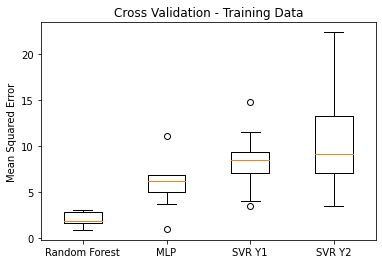

In [ ]:
import matplotlib.pyplot as plt

# Display the training box plot
fig, ax = plt.subplots()
plt.title("Cross Validation - Training Data")
plt.ylabel("Mean Squared Error")
ax.boxplot(train_mse_data)
plt.xticks([1, 2, 3, 4], ["Random Forest", "MLP", "SVR Y1", "SVR Y2"])
plt.show()

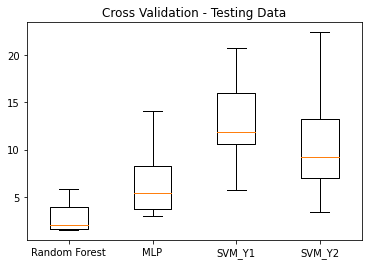

In [ ]:
# Display the test box plot
fig, ax = plt.subplots()
plt.title("Cross Validation - Testing Data")
ax.boxplot(test_mse_data)
plt.xticks([1, 2, 3, 4], ["Random Forest", "MLP", "SVM_Y1", "SVM_Y2"])
plt.show()

# Part 2 - Optimisation

## Task 2.1 - Generation of random solutions
### Extract the data

Using pandas, we extract the data and assign each column to the appropriate list.

Following this, we create 3 lists of 20 length to store this processed data into.

In [ ]:
import pandas

# Get the module data into a pandas array for preparation
modules_data = pandas.read_csv("Modules.txt", sep="|", header=None)
modules_data.columns = ["Module", "Leader", "Workshops", "Clash"]
modules_data

In [ ]:
# Get each column into a list
module = modules_data["Module"].tolist()
leader = modules_data["Leader"].tolist()
workshops = modules_data["Workshops"].tolist()
clash = modules_data["Clash"].tolist()


In [ ]:
# Sanity check to see if it worked
print(f"Module: {module}")
print(f"Leader: {leader}")
print(f"Workshops: {workshops}")
print(f"Clashes: {clash}")

Module: ['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013', 'MOD014', 'MOD015', 'MOD016', 'MOD017']
Leader: ['Zacharias Karstensen', 'Dominykas Cleary', 'Zacharias Karstensen', 'Laila Deniau', 'Brahma O Braonain', 'Brahma O Braonain', 'Ruh Kerekes', 'Brahma O Braonain', 'Dominykas Cleary', 'Dominykas Cleary', 'Sumon Kyle', 'Minu Senft', 'Laila Deniau', 'Sumon Kyle', 'Minu Senft', 'Ruh Kerekes', 'Ruh Kerekes']
Workshops: [2, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1]
Clashes: ['MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013', 'MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013', 'MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013', 'MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013', 'MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012', 'MOD001,MOD002,MOD003,MOD004,MOD005

In [ ]:
 # Create empty lists
lecture_hall = [""] * 20
lab_1 = [""] * 20
lab_2 = [""] * 20

### Storing the data into their lists

In [ ]:
import random


# Create empty lists for duplicate sessions
labs = []
labs_list = []

# Duplicate the modules that have labs
for i in range(17):
  # Get the duplicate labs
  labs.append(np.repeat(module[i], workshops[i]))

for i in range(17):
  for x in labs[i]:
    labs_list.append(x)

# Shuffle this list so that the labs are properly separated and not numerically ordered
random.shuffle(labs_list)

labs_1 = labs_list[:len(labs_list) // 2]
labs_2 = labs_list[len(labs_list) // 2:]

# Ensure that the length of both of the labs is 20 to prevent index out of bounds
while len(labs_1) < 20:
  labs_1.append("")

while len(labs_2) < 20:
  labs_2.append("")

# Check to see if it worked
print(labs_1)
print(labs_2)
print(clash)

['MOD003', 'MOD006', 'MOD015', 'MOD008', 'MOD012', 'MOD009', 'MOD009', 'MOD001', 'MOD005', 'MOD002', 'MOD016', 'MOD009', 'MOD014', 'MOD012', 'MOD007', '', '', '', '', '']
['MOD008', 'MOD003', 'MOD010', 'MOD004', 'MOD010', 'MOD006', 'MOD006', 'MOD015', 'MOD002', 'MOD001', 'MOD014', 'MOD013', 'MOD017', 'MOD011', 'MOD005', 'MOD011', '', '', '', '']
['MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013', 'MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013', 'MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013', 'MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013', 'MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD008,MOD009,MOD010,MOD011,MOD014,MOD015,MOD016,MOD017', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD009,MOD010,MOD011

In [ ]:
# Visually check which module clashes with the other, for quick reference whilst
# programming. 
for i in range(len(module)):
  print(f"{module[i]} clashes with {clash[i]}")

In [ ]:
# Assign data to lists
for i in range(17):
  lecture_hall[i] = module[i]

In [ ]:
# Generate a random solution
# The benefit of having 3 separate arrays is to allow us to shuffle each specific
# list. Alternatively, this could be done in a multidimensional list.
def generate_solution():
  # Shuffle the order of modules
  random.shuffle(lecture_hall)
  random.shuffle(labs_1)
  random.shuffle(labs_2)

  return lecture_hall, labs_1, labs_2

generate_solution()

In [ ]:
# Fitness calc, the lower number the better
def check_fitness(x):
  sum = concurrence() * precedence()
  return sum

In [ ]:
# Concurrence constraint
# A session cannot be scheduled for a time when any of its students or staff are in another session
def concurrence():
  clashes = 0

  # Lecture hall
  for i in range(20):

    # If all of the spaces are empty, skip
    if lecture_hall[i] == "" and labs_1[i] == "" and labs_2[i] == "":
        continue
        
    # Otherwise, assign the index of the lecture hall to check any lab clashes
    elif lecture_hall[i] != "":
      idx = module.index(lecture_hall[i])
      
      # If one of the labs are in the clash index, add to the clash counter
      if labs_1[i] in clash[idx] or labs_2[i] in clash[idx]:
        clashes += 1

  # Labs 1
  for i in range(20):
    
    # If all of the spaces are empty, skip
    if lecture_hall[i] == "" and labs_1[i] == "" and labs_2[i] == "":
        continue
        
    # Otherwise, assign the index of the lecture hall to check any lab clashes
    elif labs_1[i] != "":
      idx = module.index(labs_1[i])

      # If one of the labs are in the clash index, add to the clash counter
      if labs_2[i] in clash[idx]:
        clashes += 1

  # We don't need to check Labs 2, because we've already checked all other
  # possibilites, and this would cause false positives (duplicate clashes)
  return clashes
concurrence()

25

In [ ]:
# Precedence constraint
# A lab session cannot occur in the week before its corresponding lecture has taken place 
def precedence():
  clashes = 0

  for i in range(0, 20):
    if lecture_hall[i] == "":
      continue
    else:
      if lecture_hall[i] == labs_1[i]:
        clashes += 1

      if lecture_hall[i] == labs_2[i]:
        clashes += 1
        
      # Flag any labs_1 before the lecture
      for j in range(1, i + 1):
        if labs_1[j] == "":
          continue
        else:
          if lecture_hall[i] == labs_1[j]:
            clashes += 1
          
      
      # A different loop is required to bypass the previous continue 
      # Flag any labs_2 before the lecture has occured
      for k in range(0, i + 1):
        if labs_2[k] == "":
          continue
        else:
          if lecture_hall[i] == labs_2[k]:
            clashes += 1

  return clashes
precedence()

19

In [ ]:
# Comparison
def less_than(x, y):
  return x < y

In [ ]:
# Ruin and recreate mutation
# Parent isn't necessarily a required argument, however it allows for easier
# swapping in for the session replace mutation
def ruin(parent):
  parent = generate_solution()
  return parent

In [ ]:
# Session replace
# The session replace will replace one random session from it's same column
# Meaning, it will only replace a lecture with a lecture
def session_replace(parent):
  # Create the random variables to swap
  rand_1 = np.random.randint(0, 3)
  rand_2 = np.random.randint(0, 3)
  session_1 = np.random.randint(0, 20)
  session_2 = np.random.randint(0, 20)


  if session_1 != session_2:
    parent[rand_1][session_1], parent[rand_2][session_2] = parent[rand_2][session_2], parent[rand_1][session_1]

  return parent

### Random solution fitness

In [50]:
# Display random solution in the dataframe
session_data = {"Lecture hall": lecture_hall, "Lab 1": labs_1, "Lab 2": labs_2}
sessions = pandas.DataFrame(data=session_data)

print(f"Fitness of random solution: {check_fitness(session_data)}")

Fitness of random solution: 475


In [ ]:
# Display the timetable for reference
sessions

# Hillclimber

A hillclimber algorithm starts with a random solution, tries to make it better, and if it improves the solution then it will it and try to improve that new solution, and so on.

In [52]:
# Init lists that will be used
new_list = []
avg = []
ruin_parent_fitness_arr = [[[None] for i in range(500)] for j in range(30)]
replace_parent_fitness_arr = [[[None] for i in range(500)] for j in range(30)]



# Average fitness needs to be initialised as a 2d array, due to the way
# that the iterations and such are done
ruin_avg_fitness = [[[None] for i in range(500)] for j in range(30)]
ruin_min_fitness = []
ruin_max_fitness = []

replace_avg_fitness = [[[None] for i in range(500)] for j in range(30)]
replace_min_fitness = []
replace_max_fitness = []

In [53]:
# Print out the different lists to ensure correct empty initialisation
print(replace_parent_fitness_arr)
print(ruin_parent_fitness_arr)

[[[None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None], [None]

In [54]:
# Every time we run the hillclimber, we want to ensure that the lists have been reset
#reset_lists()

def hillclimber(iterations, fitness, comparison, mutation, fitness_list, list_iter):
  
  # Generate the first parent solution
  parent = generate_solution()
  parent_fitness = fitness(parent)

  # Run the algorithm n times
  for i in range(iterations):
    
    # Ruin and Recreate mutation
    child = mutation(parent)
    
    child_fitness = fitness(child)

    if comparison(child_fitness, parent_fitness):
      parent = child
      parent_fitness = child_fitness

    
    
    fitness_list[list_iter][i] = parent_fitness
    #print(fitness_list[innerlist][i])

    
    #print(f"Parent: {parent}, Child: {child_fitness}")

  return parent, parent_fitness

In [55]:
# Ruin and recreate
for i in range(30):
  ruin_x, ruin_y = hillclimber(500, check_fitness, less_than, ruin, ruin_parent_fitness_arr, i)

In [56]:
# Session replace
for i in range(30):
  replace_x, replace_y = hillclimber(500, check_fitness, less_than, session_replace, replace_parent_fitness_arr, i)

In [57]:
print(f"Best Ruin: {ruin_y}, Best Replace: {replace_y}")


Best Ruin: 234, Best Replace: 168


In [58]:
print(ruin_parent_fitness_arr)
print(replace_parent_fitness_arr)

[[352, 352, 352, 345, 345, 345, 345, 345, 345, 345, 345, 345, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230

In [59]:
ruin_avg_fitness.clear()
replace_avg_fitness.clear()
ruin_fitness_data = []
replace_fitness_data = []



# Grab each iteration of the hillclimber output
# We have used lists of len 30 but with 500 items, so now we need to swap
# to 30 items and 500 len to be able to effectively display our average
for i in range(500):
  ruin_fitness_data.append([item[i] for item in ruin_parent_fitness_arr])
  replace_fitness_data.append([item[i] for item in replace_parent_fitness_arr])


def generate_fitness_lists(fitness_data, min, max, avg):
  # Get the average for each iteration
  for i in range(500):
    total = 0
    highest = 0
    lowest = float('inf')

    for k in range(30):
      total = total + fitness_data[i][k]
      if fitness_data[i][k] > highest:
        highest = fitness_data[i][k]
      if fitness_data[i][k] < lowest:
        lowest = fitness_data[i][k]

    min.append(lowest)
    max.append(highest)
    avg.append(total / len(fitness_data[i]))

  print(f"Data: {fitness_data}")
  print(f"Min: {min}")
  print(f"Max: {max}")
  print(f"Avg: {avg}")


In [ ]:
# Check the lists are correct for ruin
generate_fitness_lists(ruin_fitness_data, ruin_min_fitness, ruin_max_fitness, ruin_avg_fitness)

In [ ]:
# Check the lists are correct for replace
generate_fitness_lists(replace_fitness_data, replace_min_fitness, replace_max_fitness, replace_avg_fitness)

##Task 2.3 - Visualisation of results

### Ruin and Recreate
This mutation works by entirely regenerating (by shuffling existing data) new solutions. Whilst this works, it's entirely random and has a lesser chance of providing a better solution due to the wider, more absolute way of changing the data. This can cause a solution that may be easily improved to be discarded entirely.


### Session Replace
On the other hand, session replace only replaces one session at a time, rather than the entire timetable. This results in a higher likelihood of a better fitness due to making smaller overall changes.


As we can see, the final average fitness of the Session Replace mutation is almost better than Ruin and Recreate mutation. We've decided that the most important factor for the outcome is the final fitness, and due to this it is clear that the Session Replace mutation is superior.

In [64]:
def plot_graph():
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.plot(replace_avg_fitness, label = "Session Replace Average Fitness", linewidth=3)
    plt.plot(replace_max_fitness, label = "Session Replace Max Fitness", linewidth=3)
    plt.plot(replace_min_fitness, label = "Session Replace Min Fitness", linewidth=3)
    plt.plot(ruin_avg_fitness, label = "Ruin and Recreate Average Fitness", linewidth=3)
    plt.plot(ruin_max_fitness, label = "Ruin and Recraete Max Fitness", linewidth=3)
    plt.plot(ruin_min_fitness, label = "Ruin and Recreate Min Fitness", linewidth=3)
    plt.legend(loc=(1.02, 0.58))

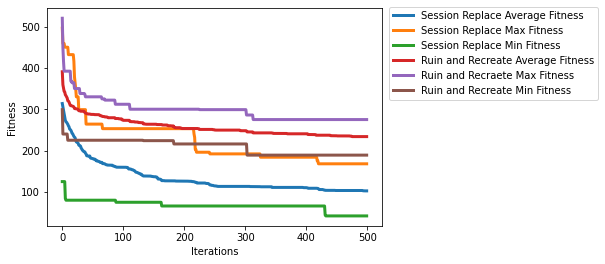

In [65]:
plot_graph()

In [67]:
print(f"Final Ruin fitness: {ruin_min_fitness[-1]}")
print(f"Final Replace fitness: {replace_min_fitness[-1]}")

Final Ruin fitness: 189
Final Replace fitness: 42
